In [1]:
# Loading Needed Packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from scipy.stats import itemfreq
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction import text
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
import random

In [4]:
# Setting the random seed for reproducible results 
random.seed(10)

In [5]:
# Read in collected recipes via csv

recipes = pd.read_csv('recipes.csv')

In [6]:
# Viewing the first few rows

recipes.head()

,Diet,Ingredients,Recipe,Title
0,Keto,almond flour ground psyllium husk powder bakin...,Preheat the oven to 350°F (175°C). Mix the dry...,The keto bread
1,Keto,"eggs shredded cheese, preferably mozzarella or...",Preheat the oven to 400°F (200°C). Start by ma...,Keto pizza
2,Keto,eggs cream cheese salt ground psyllium husk po...,Preheat oven to 300°F (150°C). Separate the eg...,Keto BLT with oopsie bread
3,Keto,"yellow onions, finely chopped garlic cloves, f...",Preheat the oven to 350°F (175°C). Fry onion a...,Keto meat pie
4,Keto,eggs cottage cheese ground psyllium husk powde...,"Add eggs, cottage cheese and ground psyllium h...",Keto pancakes with berries and whipped cream


In [7]:
# Selecting the recipes collected all from the foodnetwork.com website to test on later
foodNetworkTest = recipes[2647:]

# Selecting only the recipes collected from non-foodnetwork.com websites for initial training
# and testing
recipes = recipes[:2647]

In [8]:
# Finding the total number of recipes in the recipes dataset
print(len(recipes['Diet']))

# Finding the number of recipes for each diet type
print(recipes['Diet'].value_counts())

2647
Vegan            664
Keto             611
Standard         488
Mediterranean    458
Paleo            426
Name: Diet, dtype: int64


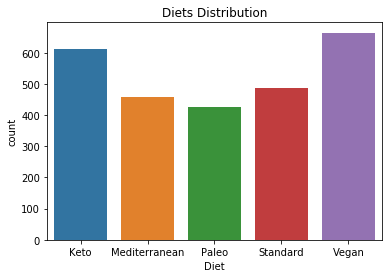

In [9]:
# Looking at the distribution of diets

sns.countplot(recipes['Diet'].sort_values())
plt.title('Diets Distribution')
plt.show()

In [10]:
# Creating list of the recipe label diets and list of recipes

y = recipes['Diet'].values.astype('str')
X = recipes['Ingredients'].values.astype('str')

In [11]:
# Creating a custom stopwords list to remove numbers, measurement amounts, unicode fractions,
# and names of the diets and nicknames of the diets
stopwords = ['english', 'cup','cups','teaspoon','teaspoons','tablespoon', 'tablespoons',
             'ounce', 'ounces', 'oz', 'pound', 'pounds','keto','ketogenic', 'paleo',
            'paleolithic', 'mediterranean', 'vegan', 'or', 'of', 'each', 'the', 'and', 
            'optional']

unicodeFractionsList = ["\u00BC",
    "\u00BD",
    "\u00BE",
    "\u2150",
    "\u2151",
    "\u2152",
    "\u2153",
    "\u2154",
    "\u2155",
    "\u2156",
    "\u2157",
    "\u2158",
    "\u2159",
    "\u215A",
    "\u215B",
    "\u215C",
    "\u215D",
    "\u215E",
    "\u2189",]

for i in range(0,1000):
    stopwords.append(str(i))
    stopwords.append(str(i)+'g')
    
for i in range(1,10):
    for frac in unicodeFractionsList:
        stopwords.append(frac)
        stopwords.append(str(i)+frac)
    

my_stop_words = text.ENGLISH_STOP_WORDS.union(stopwords)

In [12]:
# Using cross validation to test which vectorization and algorithm provide the best results


# Testing cross-validation score for boolean vectors with unigrams

nb_clf_pipe = Pipeline([('vect', CountVectorizer(lowercase=True, encoding='latin-1', binary=True, min_df=5, 
                                          stop_words=frozenset(my_stop_words))),('nb', MultinomialNB())])
scores = cross_val_score(nb_clf_pipe, X, y, cv=5)
avg=sum(scores)/len(scores)
print('Boolean MNB Unigram Cross-Validation Accuracy: ', avg)

# Testing cross-validation score for boolean vectors with bigrams

nb_clf_pipe = Pipeline([('vect', CountVectorizer(lowercase=True,encoding='latin-1', binary=True, ngram_range=(1,2),
                                                min_df=5, stop_words=frozenset(my_stop_words))),('nb', MultinomialNB())])
scores = cross_val_score(nb_clf_pipe, X, y, cv=5)
avg=sum(scores)/len(scores)
print('Boolean MNB Bigram Cross-Validation Accuracy: ', avg)

# Testing cross-validation score for boolean vectors with trigrams

nb_clf_pipe = Pipeline([('vect', CountVectorizer(lowercase=True,encoding='latin-1', binary=True, ngram_range=(1,3), min_df=5, 
                                          stop_words=frozenset(my_stop_words))),('nb', MultinomialNB())])
scores = cross_val_score(nb_clf_pipe, X, y, cv=5)
avg=sum(scores)/len(scores)
print('Boolean MNB Trigram Cross-Validation Accuracy: ', avg)

# Testing cross-validation score for boolean vectors with unigrams BernoulliNB

nb_clf_pipe = Pipeline([('vect', CountVectorizer(lowercase=True, encoding='latin-1', binary=True, min_df=5, 
                                          stop_words=frozenset(my_stop_words))),('bn', BernoulliNB())])
scores = cross_val_score(nb_clf_pipe, X, y, cv=5)
avg=sum(scores)/len(scores)
print('BernoulliNB Unigram Cross-Validation Accuracy: ', avg)

# Testing cross-validation score for boolean vectors with bigrams BernoulliNB

nb_clf_pipe = Pipeline([('vect', CountVectorizer(lowercase=True,encoding='latin-1', binary=True, ngram_range=(1,2),
                                                min_df=5, stop_words=frozenset(my_stop_words))),('bn', BernoulliNB())])
scores = cross_val_score(nb_clf_pipe, X, y, cv=5)
avg=sum(scores)/len(scores)
print('BernoulliNB Bigram Cross-Validation Accuracy: ', avg)

# Testing cross-validation score for boolean vectors with trigrams BernoulliNB

nb_clf_pipe = Pipeline([('vect', CountVectorizer(lowercase=True,encoding='latin-1', binary=True, ngram_range=(1,3), min_df=5, 
                                          stop_words=frozenset(my_stop_words))),('bn', BernoulliNB())])
scores = cross_val_score(nb_clf_pipe, X, y, cv=5)
avg=sum(scores)/len(scores)
print('BernoulliNB Trigram Cross-Validation Accuracy: ', avg)

# Testing cross-validation score for term frequency vectors with unigrams

nb_clf_pipe = Pipeline([('vect', CountVectorizer(lowercase=True, encoding='latin-1', binary=False, min_df=5, 
                                          stop_words=frozenset(my_stop_words))),('nb', MultinomialNB())])
scores = cross_val_score(nb_clf_pipe, X, y, cv=5)
avg=sum(scores)/len(scores)
print('Term Frequency Unigram Cross-Validation Accuracy: ', avg)

# Testing cross-validation score for term frequency vectors with bigrams

nb_clf_pipe = Pipeline([('vect', CountVectorizer(lowercase=True,encoding='latin-1', binary=False, ngram_range=(1,2),
                                                min_df=5, stop_words=frozenset(my_stop_words))),('nb', MultinomialNB())])
scores = cross_val_score(nb_clf_pipe, X, y, cv=5)
avg=sum(scores)/len(scores)
print('Term Frequency Bigram Cross-Validation Accuracy: ', avg)

# Testing cross-validation score for term frequency vectors with trigrams

nb_clf_pipe = Pipeline([('vect', CountVectorizer(lowercase=True,encoding='latin-1', binary=False, ngram_range=(1,3), min_df=5, 
                                          stop_words=frozenset(my_stop_words))),('nb', MultinomialNB())])
scores = cross_val_score(nb_clf_pipe, X, y, cv=5)
avg=sum(scores)/len(scores)
print('Term Frequency Trigram Cross-Validation Accuracy: ', avg)


Boolean MNB Unigram Cross-Validation Accuracy:  0.8829426900628301
Boolean MNB Bigram Cross-Validation Accuracy:  0.9063427174053784
Boolean MNB Trigram Cross-Validation Accuracy:  0.9093573564282303
BernoulliNB Unigram Cross-Validation Accuracy:  0.8772487662224684
BernoulliNB Bigram Cross-Validation Accuracy:  0.8934967758241983
BernoulliNB Trigram Cross-Validation Accuracy:  0.8927406268444994
Term Frequency Unigram Cross-Validation Accuracy:  0.8780369596752026
Term Frequency Bigram Cross-Validation Accuracy:  0.8987869227490173
Term Frequency Trigram Cross-Validation Accuracy:  0.9044466783763481


In [13]:
# Trying the same process out on the Steps vs the Ingredients

# Creating list of the recipe label diets and list of recipes

y = recipes['Diet'].values.astype('str')
X = recipes['Recipe'].values.astype('str')

In [14]:
# Using cross validation to test which vectorization and algorithm provide the best results


# Testing cross-validation score for boolean vectors with unigrams

nb_clf_pipe = Pipeline([('vect', CountVectorizer(lowercase=True, encoding='latin-1', binary=True, min_df=5, 
                                          stop_words=frozenset(my_stop_words))),('nb', MultinomialNB())])
scores = cross_val_score(nb_clf_pipe, X, y, cv=5)
avg=sum(scores)/len(scores)
print('Boolean MNB Unigram Cross-Validation Accuracy: ', avg)

# Testing cross-validation score for boolean vectors with bigrams

nb_clf_pipe = Pipeline([('vect', CountVectorizer(lowercase=True,encoding='latin-1', binary=True, ngram_range=(1,2),
                                                min_df=5, stop_words=frozenset(my_stop_words))),('nb', MultinomialNB())])
scores = cross_val_score(nb_clf_pipe, X, y, cv=5)
avg=sum(scores)/len(scores)
print('Boolean MNB Bigram Cross-Validation Accuracy: ', avg)

# Testing cross-validation score for boolean vectors with trigrams

nb_clf_pipe = Pipeline([('vect', CountVectorizer(lowercase=True,encoding='latin-1', binary=True, ngram_range=(1,3), min_df=5, 
                                          stop_words=frozenset(my_stop_words))),('nb', MultinomialNB())])
scores = cross_val_score(nb_clf_pipe, X, y, cv=5)
avg=sum(scores)/len(scores)
print('Boolean MNB Trigram Cross-Validation Accuracy: ', avg)

# Testing cross-validation score for boolean vectors with unigrams BernoulliNB

nb_clf_pipe = Pipeline([('vect', CountVectorizer(lowercase=True, encoding='latin-1', binary=True, min_df=5, 
                                          stop_words=frozenset(my_stop_words))),('bn', BernoulliNB())])
scores = cross_val_score(nb_clf_pipe, X, y, cv=5)
avg=sum(scores)/len(scores)
print('BernoulliNB Unigram Cross-Validation Accuracy: ', avg)

# Testing cross-validation score for boolean vectors with bigrams BernoulliNB

nb_clf_pipe = Pipeline([('vect', CountVectorizer(lowercase=True,encoding='latin-1', binary=True, ngram_range=(1,2),
                                                min_df=5, stop_words=frozenset(my_stop_words))),('bn', BernoulliNB())])
scores = cross_val_score(nb_clf_pipe, X, y, cv=5)
avg=sum(scores)/len(scores)
print('BernoulliNB Bigram Cross-Validation Accuracy: ', avg)

# Testing cross-validation score for boolean vectors with trigrams BernoulliNB

nb_clf_pipe = Pipeline([('vect', CountVectorizer(lowercase=True,encoding='latin-1', binary=True, ngram_range=(1,3), min_df=5, 
                                          stop_words=frozenset(my_stop_words))),('bn', BernoulliNB())])
scores = cross_val_score(nb_clf_pipe, X, y, cv=5)
avg=sum(scores)/len(scores)
print('BernoulliNB Trigram Cross-Validation Accuracy: ', avg)

# Testing cross-validation score for term frequency vectors with unigrams

nb_clf_pipe = Pipeline([('vect', CountVectorizer(lowercase=True, encoding='latin-1', binary=False, min_df=5, 
                                          stop_words=frozenset(my_stop_words))),('nb', MultinomialNB())])
scores = cross_val_score(nb_clf_pipe, X, y, cv=5)
avg=sum(scores)/len(scores)
print('Term Frequency Unigram Cross-Validation Accuracy: ', avg)

# Testing cross-validation score for term frequency vectors with bigrams

nb_clf_pipe = Pipeline([('vect', CountVectorizer(lowercase=True,encoding='latin-1', binary=False, ngram_range=(1,2),
                                                min_df=5, stop_words=frozenset(my_stop_words))),('nb', MultinomialNB())])
scores = cross_val_score(nb_clf_pipe, X, y, cv=5)
avg=sum(scores)/len(scores)
print('Term Frequency Bigram Cross-Validation Accuracy: ', avg)

# Testing cross-validation score for term frequency vectors with trigrams

nb_clf_pipe = Pipeline([('vect', CountVectorizer(lowercase=True,encoding='latin-1', binary=False, ngram_range=(1,3), min_df=5, 
                                          stop_words=frozenset(my_stop_words))),('nb', MultinomialNB())])
scores = cross_val_score(nb_clf_pipe, X, y, cv=5)
avg=sum(scores)/len(scores)
print('Term Frequency Trigram Cross-Validation Accuracy: ', avg)

Boolean MNB Unigram Cross-Validation Accuracy:  0.9153951460136863
Boolean MNB Bigram Cross-Validation Accuracy:  0.9293654077519203
Boolean MNB Trigram Cross-Validation Accuracy:  0.9244475261062849
BernoulliNB Unigram Cross-Validation Accuracy:  0.865816620252693
BernoulliNB Bigram Cross-Validation Accuracy:  0.879806872237373
BernoulliNB Trigram Cross-Validation Accuracy:  0.8786683497029294
Term Frequency Unigram Cross-Validation Accuracy:  0.9029329373652036
Term Frequency Bigram Cross-Validation Accuracy:  0.9210577333963113
Term Frequency Trigram Cross-Validation Accuracy:  0.9236978026947718


In [15]:
# Testing SVM

# Trying the same process out on the Ingredients

# Creating list of the recipe label diets and list of recipes

y = recipes['Diet'].values.astype('str')
X = recipes['Ingredients'].values.astype('str')

In [16]:
# Using Cross-Validation to find out which type of vectorization provides the most
# accuracy in classification on the ingredients

# Unigram Boolean Vectors

svm_clf_pipe = Pipeline([('vect', CountVectorizer(lowercase=True,encoding='latin-1', binary=True, min_df=5, 
                                          stop_words=frozenset(stopwords))),('svm', LinearSVC(C=1))])
scores = cross_val_score(svm_clf_pipe, X, y, cv=5)
avg=sum(scores)/len(scores)
print('Unigram Boolean SVM: ',avg)

# Bigram Boolean Vectors

svm_clf_pipe = Pipeline([('vect', CountVectorizer(lowercase=True,encoding='latin-1', binary=True, ngram_range=(1,2),
                                                min_df=5, stop_words=frozenset(stopwords))),('svm', LinearSVC(C=1))])
scores = cross_val_score(svm_clf_pipe, X, y, cv=5)
avg=sum(scores)/len(scores)
print('Bigram Boolean SVM: ',avg)

# Trigram Boolean

svm_clf_pipe = Pipeline([('vect', CountVectorizer(lowercase=True,encoding='latin-1', binary=True, ngram_range=(1,3), min_df=5, 
                                          stop_words=frozenset(stopwords))),('svm', LinearSVC(C=1))])
scores = cross_val_score(svm_clf_pipe, X, y, cv=5)
avg=sum(scores)/len(scores)
print('Trigram Boolean  SVM: ', avg)

# Unigram Term Frequency Vectors

svm_clf_pipe = Pipeline([('vect', CountVectorizer(lowercase=True,encoding='latin-1', binary=False, min_df=5, 
                                          stop_words=frozenset(stopwords))),('svm', LinearSVC(C=1))])
scores = cross_val_score(svm_clf_pipe, X, y, cv=5)
avg=sum(scores)/len(scores)
print('Unigram Term Frequency SVM: ',avg)

# Bigram Term Frequency  Vectors

svm_clf_pipe = Pipeline([('vect', CountVectorizer(lowercase=True,encoding='latin-1', binary=False, ngram_range=(1,2),
                                                min_df=5, stop_words=frozenset(stopwords))),('svm', LinearSVC(C=1))])
scores = cross_val_score(svm_clf_pipe, X, y, cv=5)
avg=sum(scores)/len(scores)
print('Bigram Term Frequency SVM: ',avg)

# Trigram Term Frequency 

svm_clf_pipe = Pipeline([('vect', CountVectorizer(lowercase=True,encoding='latin-1', binary=False, ngram_range=(1,3), min_df=5, 
                                          stop_words=frozenset(stopwords))),('svm', LinearSVC(C=1))])
scores = cross_val_score(svm_clf_pipe, X, y, cv=5)
avg=sum(scores)/len(scores)
print('Trigram Term Frequency SVM: ', avg)

Unigram Boolean SVM:  0.9028678818573181
Bigram Boolean SVM:  0.9263029309753239
Trigram Boolean  SVM:  0.9217710489391642
Unigram Term Frequency SVM:  0.8972110201645155
Bigram Term Frequency SVM:  0.9202529738579901
Trigram Term Frequency SVM:  0.9213971872300715


In [17]:
# Looking for the best C value with the top scoring Bigram Boolean vectors

# Defining a list of possible C values to test
cVals = [.01, .05, .1, .5, 1, 2, 3, 5, 10, 20, 50, 100]

for c in cVals:
    svm_clf_pipe = Pipeline([('vect', CountVectorizer(lowercase=True,encoding='latin-1', binary=True, ngram_range=(1,2), min_df=5, 
                                          stop_words=frozenset(stopwords))),('svm', LinearSVC(C=c))])
    scores = cross_val_score(svm_clf_pipe, X, y, cv=5)
    avg=sum(scores)/len(scores)
    print('C: ',c)
    print(avg)

C:  0.01
0.931235763392422
C:  0.05
0.9372614313513645
C:  0.1
0.9353760360449165
C:  0.5
0.9278195281525669
C:  1
0.9263029309753239
C:  2
0.918362603866138
C:  3
0.916856725948336
C:  5
0.9149634890431054
C:  10
0.9107953685774122
C:  20
0.9077686160649818
C:  50
0.9055023062235055
C:  100
0.9055037356117273


In [18]:
# Testing SVM

# Trying the same process out on the Steps vs the Ingredients

# Creating list of the recipe label diets and list of recipes

y = recipes['Diet'].values.astype('str')
X = recipes['Recipe'].values.astype('str')

In [19]:
# Using Cross-Validation to find out which type of vectorization provides the most
# accuracy in classification on the steps in the directions

# Unigram Boolean Vectors

svm_clf_pipe = Pipeline([('vect', CountVectorizer(lowercase=True,encoding='latin-1', binary=True, min_df=5, 
                                          stop_words=frozenset(stopwords))),('svm', LinearSVC(C=1))])
scores = cross_val_score(svm_clf_pipe, X, y, cv=5)
avg=sum(scores)/len(scores)
print('Unigram Boolean SVM: ',avg)

# Bigram Boolean Vectors

svm_clf_pipe = Pipeline([('vect', CountVectorizer(lowercase=True,encoding='latin-1', binary=True, ngram_range=(1,2),
                                                min_df=5, stop_words=frozenset(stopwords))),('svm', LinearSVC(C=1))])
scores = cross_val_score(svm_clf_pipe, X, y, cv=5)
avg=sum(scores)/len(scores)
print('Bigram Boolean SVM: ',avg)

# Trigram Boolean

svm_clf_pipe = Pipeline([('vect', CountVectorizer(lowercase=True,encoding='latin-1', binary=True, ngram_range=(1,3), min_df=5, 
                                          stop_words=frozenset(stopwords))),('svm', LinearSVC(C=1))])
scores = cross_val_score(svm_clf_pipe, X, y, cv=5)
avg=sum(scores)/len(scores)
print('Trigram Boolean  SVM: ', avg)

# Unigram Term Frequency Vectors

svm_clf_pipe = Pipeline([('vect', CountVectorizer(lowercase=True,encoding='latin-1', binary=False, min_df=5, 
                                          stop_words=frozenset(stopwords))),('svm', LinearSVC(C=1))])
scores = cross_val_score(svm_clf_pipe, X, y, cv=5)
avg=sum(scores)/len(scores)
print('Unigram Term Frequency SVM: ',avg)

# Bigram Term Frequency  Vectors

svm_clf_pipe = Pipeline([('vect', CountVectorizer(lowercase=True,encoding='latin-1', binary=False, ngram_range=(1,2),
                                                min_df=5, stop_words=frozenset(stopwords))),('svm', LinearSVC(C=1))])
scores = cross_val_score(svm_clf_pipe, X, y, cv=5)
avg=sum(scores)/len(scores)
print('Bigram Term Frequency SVM: ',avg)

# Trigram Term Frequency 

svm_clf_pipe = Pipeline([('vect', CountVectorizer(lowercase=True,encoding='latin-1', binary=False, ngram_range=(1,3), min_df=5, 
                                          stop_words=frozenset(stopwords))),('svm', LinearSVC(C=1))])
scores = cross_val_score(svm_clf_pipe, X, y, cv=5)
avg=sum(scores)/len(scores)
print('Trigram Term Frequency SVM: ', avg)

Unigram Boolean SVM:  0.9149900500989651
Bigram Boolean SVM:  0.9285543652762966
Trigram Boolean  SVM:  0.9274179531242236
Unigram Term Frequency SVM:  0.9134869798315526
Bigram Term Frequency SVM:  0.9236693572553181
Trigram Term Frequency SVM:  0.9244176405313296


In [20]:
# Looking for the best C value with the top performing bigram boolean vectors
cVals = [.01, .05, .1, .5, 1, 2, 3, 5, 10, 20, 50, 100]

for c in cVals:
    svm_clf_pipe = Pipeline([('vect', CountVectorizer(lowercase=True,encoding='latin-1', binary=True, ngram_range=(1,2), min_df=5, 
                                          stop_words='english')),('svm', LinearSVC(C=c))])
    scores = cross_val_score(svm_clf_pipe, X, y, cv=5)
    avg=sum(scores)/len(scores)
    print('C: ',c)
    print(avg)


C:  0.01
0.931968420123512
C:  0.05
0.9330976286818317
C:  0.1
0.9319605570301693
C:  0.5
0.9243947700138803
C:  1
0.9232598357657384
C:  2
0.9221227641140765
C:  3
0.9217468242644523
C:  5
0.9217489724152526
C:  10
0.9213694657738862
C:  20
0.9213694657738862
C:  50
0.9213694657738862
C:  100
0.9206104524911538


In [21]:
# Using Optimal Settings

# Creating list of the recipe label diets and list of recipes

y = recipes['Diet'].values.astype('str')
X = recipes['Ingredients'].values.astype('str')

# Splitting into training and testing sets with a 75% for training and 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# Vectorizing to find term frequency to look into possibily creating custom 
# Stop words list

#  Bigram Boolen vectorizer, set minimum document frequency to 5
optimal_vectorizer = CountVectorizer(lowercase=True,encoding='latin-1', binary=True, ngram_range=(1,2), min_df=5, 
                                          stop_words=frozenset(stopwords))

# Checking on the frequency of the labels to see if the sample of training data is
# representative and maintains distribution

training_labels = set(y_train)
print(training_labels)
training_category_dist = itemfreq(y_train)
print(training_category_dist)

# Fitting vocabulary in training documents and transform the training documents into vectors
X_train_vec = optimal_vectorizer.fit_transform(X_train)

# Transforming the testing documents using the same vectorization

X_test_vec = optimal_vectorizer.transform(X_test)

# check the content of a document vector
print(X_train_vec.shape)
print(X_train_vec[0].toarray())


# initialize the LinearSVC model
svm_clf = LinearSVC(C=0.05)

# use the training data to train the model
svm_clf.fit(X_train_vec,y_train)

# Printing the accuracy score

print('Accuracy: ',svm_clf.score(X_test_vec,y_test))

# Printing confusion matrix and classification report

y_pred = svm_clf.predict(X_test_vec)
cm=confusion_matrix(y_test, y_pred, labels=['Keto','Paleo','Vegan','Standard','Mediterranean'])
print(cm)
print()

target_names = ['Keto','Paleo','Vegan','Standard','Mediterranean']
print(classification_report(y_test, y_pred, target_names=target_names))


print(precision_score(y_test, y_pred, average=None))
print(recall_score(y_test, y_pred, average=None))

(1985,) (1985,) (662,) (662,)
{'Mediterranean', 'Standard', 'Keto', 'Vegan', 'Paleo'}
[['Keto' '462']
 ['Mediterranean' '338']
 ['Paleo' '331']
 ['Standard' '357']
 ['Vegan' '497']]
(1985, 2502)
[[0 0 0 ... 0 0 0]]
Accuracy:  0.9425981873111783
[[145   3   0   0   1]
 [  5  85   5   0   0]
 [  3   5 159   0   0]
 [  2   5   2 121   1]
 [  1   1   2   2 114]]

               precision    recall  f1-score   support

         Keto       0.93      0.97      0.95       149
        Paleo       0.98      0.95      0.97       120
        Vegan       0.86      0.89      0.88        95
     Standard       0.98      0.92      0.95       131
Mediterranean       0.95      0.95      0.95       167

  avg / total       0.94      0.94      0.94       662

[0.92948718 0.98275862 0.85858586 0.98373984 0.94642857]
[0.97315436 0.95       0.89473684 0.92366412 0.95209581]


In [22]:
# print out specific type of error for further analysis based off of the confusion matrix

err_cnt = 0
for i in range(0, len(y_test)):
    if(y_test[i]=='Standard' and y_pred[i]=='Vegan'):
        print(X_test[i])
        print()
        err_cnt = err_cnt+1
        print(recipes['Title'].loc[recipes['Ingredients']==X_test[i]])
        print()
print("errors:", err_cnt)

2/3 cup 2% milk 3/4 cup frozen unsweetened strawberries 1/3 cup frozen unsweetened raspberries 2 tablespoons sugar 3/4 cup ice cubes

2430    Berry Smoothies
Name: Title, dtype: object

1 cup chilled apple cider or unsweetened apple juice 1 cup chilled ginger ale or lemon-lime soda 1 cup vanilla ice cream 2 tablespoons caramel sundae syrup Finely chopped peeled apple, optional

2551    Caramel Apple Float
Name: Title, dtype: object

errors: 2


In [23]:
# Finding feature ranks by recoding each diet as is this type of diet or not type of diet
# Using Optimal Settings

# Creating list of the recipe label diets and list of recipes

y = recipes['Diet'].values.astype('str')
X = recipes['Ingredients'].values.astype('str')
ketoLabels = []
paleoLabels = []
veganLabels = []
standardLabels = []
medLabels = []

for label in y:
    if label == 'Keto':
        ketoLabels.append('Keto')
        paleoLabels.append('Not Paleo')
        veganLabels.append('Not Vegan')
        standardLabels.append('Not Standard')
        medLabels.append('Not Mediterranean')
    elif label == 'Paleo':
        ketoLabels.append('Not Keto')
        paleoLabels.append('Paleo')
        veganLabels.append('Not Vegan')
        standardLabels.append('Not Standard')
        medLabels.append('Not Mediterranean')
    elif label == 'Vegan':
        ketoLabels.append('Not Keto')
        paleoLabels.append('Not Paleo')
        veganLabels.append('Vegan')
        standardLabels.append('Not Standard')
        medLabels.append('Not Mediterranean')
    elif label == 'Standard':
        ketoLabels.append('Not Keto')
        paleoLabels.append('Not Paleo')
        veganLabels.append('Not Vegan')
        standardLabels.append('Standard')
        medLabels.append('Not Mediterranean')
    else:
        ketoLabels.append('Not Keto')
        paleoLabels.append('Not Paleo')
        veganLabels.append('Not Vegan')
        standardLabels.append('Not Standard')
        medLabels.append('Mediterranean')

#  unigram term frequency vectorizer, set minimum document frequency to 5
optimal_vectorizer = CountVectorizer(lowercase=True,encoding='latin-1', binary=True, ngram_range=(1,2), min_df=5, 
                                          stop_words=frozenset(stopwords))

# fit vocabulary on all documnets
X_train_vec = optimal_vectorizer.fit_transform(X)


# initialize the LinearSVC model
svm_clf = LinearSVC(C=0.05)

# Finding indicative terms for Keto Diets

# use the training data to train the model
svm_clf.fit(X_train_vec,ketoLabels)

feature_ranks = sorted(zip(svm_clf.coef_[0], optimal_vectorizer.get_feature_names()))

# Finding the features that are least likely to be associated with Keto Diets
not_keto_10 = feature_ranks[-10:]
print("Indicative terms of Non-Keto Diets")
for i in range(0, len(not_keto_10)):
    print(not_keto_10[i])
print()

# Finding the features that are most likely to be associated with Keto Diets

very_keto_10 = feature_ranks[:10]
print("Indicative terms of Keto Diets")
for i in range(0, len(very_keto_10)):
    print(very_keto_10[i])
print()

# Finding indicative terms for Paleo Diets

# use the training data to train the model
svm_clf.fit(X_train_vec,paleoLabels)

feature_ranks = sorted(zip(svm_clf.coef_[0], optimal_vectorizer.get_feature_names()))

# Finding the features that are least likely to be associated with Paleo Diets

not_paleo_10 = feature_ranks[:10]
print("Indicative terms of Non-Paleo Diets")
for i in range(0, len(not_paleo_10)):
    print(not_paleo_10[i])
print()

# Finding the features that are most likely to be associated with Paleo Diets

very_paleo_10 = feature_ranks[-10:]
print("Indicative terms of Paleo Diets")
for i in range(0, len(very_paleo_10)):
    print(very_paleo_10[i])
print()

# Finding indicative terms for Vegan Diets

# use the training data to train the model
svm_clf.fit(X_train_vec,veganLabels)

feature_ranks = sorted(zip(svm_clf.coef_[0], optimal_vectorizer.get_feature_names()))

# Finding the features that are least likely to be associated with Vegan Diets

not_vegan_10 = feature_ranks[:10]
print("Indicative terms of Non-Vegan Diets")
for i in range(0, len(not_vegan_10)):
    print(not_vegan_10[i])
print()

# Finding the features that are most likely to be associated with Vegan Diets

very_vegan_10 = feature_ranks[-10:]
print("Indicative terms of Vegan Diets")
for i in range(0, len(very_vegan_10)):
    print(very_vegan_10[i])
print()

# Finding indicative terms for Standard Diets

# use the training data to train the model
svm_clf.fit(X_train_vec,standardLabels)

feature_ranks = sorted(zip(svm_clf.coef_[0], optimal_vectorizer.get_feature_names()))

# Finding the features that are least likely to be associated with Standard Diets

not_standard_10 = feature_ranks[:10]
print("Indicative terms of Non-Standard Diets")
for i in range(0, len(not_standard_10)):
    print(not_standard_10[i])
print()

# Finding the features that are most likely to be associated with Standard Diets

very_standard_10 = feature_ranks[-10:]
print("Indicative terms of Standard Diets")
for i in range(0, len(very_standard_10)):
    print(very_standard_10[i])
print()

# Finding indicative terms for Mediterranean Diets

# use the training data to train the model
svm_clf.fit(X_train_vec,medLabels)

feature_ranks = sorted(zip(svm_clf.coef_[0], optimal_vectorizer.get_feature_names()))

# Finding the features that are least likely to be associated with Mediterranean Diets

not_med_10 = feature_ranks[-10:]
print("Indicative terms of Non-Mediterranean Diets")
for i in range(0, len(not_med_10)):
    print(not_med_10[i])
print()

# Finding the features that are most likely to be associated with Mediterranean Diets

very_med_10 = feature_ranks[:10]
print("Indicative terms of Mediterranean Diets")
for i in range(0, len(very_med_10)):
    print(very_med_10[i])
print()

Indicative terms of Non-Keto Diets
(0.21778818797555238, 'butter melted')
(0.21973196008800394, 'salt fresh')
(0.2237585418660362, 'medium')
(0.23284472564007236, 'cinnamon')
(0.23588630067098418, 'head')
(0.284299012402162, 'garlic')
(0.30110144263812755, 'minced')
(0.32245400334779617, 'onion')
(0.3675451014220523, 'honey')
(0.45388596580333196, 'sugar')

Indicative terms of Keto Diets
(-0.4606146786128101, 'mayonnaise')
(-0.37832085347061545, 'butter')
(-0.32817520962680297, 'paprika powder')
(-0.32416178950961677, 'garlic cloves')
(-0.30403173898047514, 'salt pepper')
(-0.28513032272559924, 'ground black')
(-0.282044633584863, 'yellow onions')
(-0.27942863686840913, 'avocados')
(-0.26844096217839336, 'chili flakes')
(-0.2664946817029362, 'salt ground')

Indicative terms of Non-Paleo Diets
(-0.4078479182969824, 'mayonnaise')
(-0.4071526265694024, 'sugar')
(-0.39140839543162476, 'cheese')
(-0.32799259813528525, 'to')
(-0.32191395696523883, 'light')
(-0.3144930098132198, 'medium')
(-0

In [503]:
# Using Optimal Settings Tested on recipes collected from a site other than the ones
# used for training. 

# Creating list of the recipe label diets and list of recipes

y = recipes['Diet'].values.astype('str')
X = recipes['Ingredients'].values.astype('str')

#  unigram term frequency vectorizer, set minimum document frequency to 5
optimal_vectorizer = CountVectorizer(lowercase=True,encoding='latin-1', binary=True, ngram_range=(1,2), min_df=5, 
                                          stop_words=frozenset(stopwords))

# fit vocabulary in training documents and transform the training documents into vectors
X_train_vec = optimal_vectorizer.fit_transform(X)

# Transforming the testing documents using the same vectorization

X_test_vec = optimal_vectorizer.transform(foodNetworkTest['Ingredients'].values.astype('str'))

# check the content of a document vector
print(X_train_vec.shape)
print(X_train_vec[0].toarray())


# initialize the LinearSVC model
svm_clf = LinearSVC(C=0.1)

# use the training data to train the model
svm_clf.fit(X_train_vec,y)

# Printing the accuracy score

print('Accuracy: ',svm_clf.score(X_test_vec,foodNetworkTest['Diet'].values.astype('str')))

# Printing confusion matrix and classification report

y_pred = svm_clf.predict(X_test_vec)
cm=confusion_matrix(foodNetworkTest['Diet'].values.astype('str'), y_pred, labels=['Keto','Paleo','Vegan','Mediterranean'])
print(cm)
print()

target_names = ['Keto','Paleo','Vegan','Mediterranean']
print(classification_report(foodNetworkTest['Diet'].values.astype('str'), y_pred, target_names=target_names))


print(precision_score(foodNetworkTest['Diet'].values.astype('str'), y_pred, average=None))
print(recall_score(foodNetworkTest['Diet'].values.astype('str'), y_pred, average=None))

(2647, 3166)
[[0 0 0 ... 0 0 0]]
Accuracy:  0.5
[[ 2  0  0  4]
 [ 0  1  0  8]
 [ 0  0  5  5]
 [ 0  0  0 13]]

               precision    recall  f1-score   support

         Keto       1.00      0.29      0.44         7
        Paleo       0.43      1.00      0.60        13
        Vegan       1.00      0.11      0.20         9
Mediterranean       0.00      0.00      0.00         0

  avg / total       0.82      0.50      0.48        42

[1.         0.43333333 1.         0.         1.        ]
[0.28571429 1.         0.11111111 0.         0.38461538]


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1428: UserWarning: labels size, 5, does not match size of target_names, 4
  .format(len(labels), len(target_names))
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
